# What makes a song great? Part 3

## Visualizing the greatest songs of all times

### Intro and setup

In two previous articles we scraped _Rolling Stone_'s list of the "Greatest 500 songs of all time", and retrieved audio features for each of them from Spotify's API (with the help of the amazing ```spotipy``` library). Now that we have all the data we can start doing some analysis. 
For example, here are some questions that sprung to my mind when I first conceived of running this analysis:

- is the "greatness" of a song somehow linked to its popularity?
- which artists are featured more often?
- how do the songs' features evolve in time?
- are there any characteristics that somehow are more common in the "greatest songs of all time"?
- ...

In what follows I will answer these questions and more with the help of data analysis and visualization.

Note that you can download the dataset from Kaggle and that the source code for this article is available as a notebook in the following GitHub repo.

Let's get started by importing some libraries and loading the data in `pandas`.

In [291]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np

sns.set_style('white')

#plt.xkcd() # uncomment this: it's fun
%matplotlib inline
%config InlineBackend.figure_format='retina'

Let's take a look at our dataframe.

In [292]:
df = pd.read_csv('rollingstone_2021.csv')
df.head()

,Unnamed: 0,Artist,Title,Year,Writers,Spotify id,Popularity,danceability,energy,key,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0,Kanye West,Stronger,2007,"Mike Dean, Edwin Birdsong, Guy-Manuel de Homem...",4fzsfWzRhPawzqhX8Qt9F3,84,0.617,0.717,10,...,0.4080,0.490,103.992,audio_features,4fzsfWzRhPawzqhX8Qt9F3,spotify:track:4fzsfWzRhPawzqhX8Qt9F3,https://api.spotify.com/v1/tracks/4fzsfWzRhPaw...,https://api.spotify.com/v1/audio-analysis/4fzs...,311867,4
1,1,The Supremes,Baby Love,1964,"Brian Holland, Lamont Dozier, Eddie Holland",5uES1C2NgkdrNHiCwf9jRr,69,0.595,0.643,5,...,0.5380,0.730,135.633,audio_features,5uES1C2NgkdrNHiCwf9jRr,spotify:track:5uES1C2NgkdrNHiCwf9jRr,https://api.spotify.com/v1/tracks/5uES1C2Ngkdr...,https://api.spotify.com/v1/audio-analysis/5uES...,158040,4
2,2,Townes Van Zandt,Pancho and Lefty,1972,Townes Van Zandt,42Wb5T7YmdrzVD81cUWWAg,33,0.257,0.453,2,...,0.5640,0.397,148.848,audio_features,42Wb5T7YmdrzVD81cUWWAg,spotify:track:42Wb5T7YmdrzVD81cUWWAg,https://api.spotify.com/v1/tracks/42Wb5T7Ymdrz...,https://api.spotify.com/v1/audio-analysis/42Wb...,241080,4
3,3,Lizzo,Truth Hurts,2017,"Eric Frederic, Amina Patrice, Bogle-Barriteau,...",3HWzoMvoF3TQfYg4UPszDq,78,0.715,0.624,4,...,0.1230,0.412,158.087,audio_features,3HWzoMvoF3TQfYg4UPszDq,spotify:track:3HWzoMvoF3TQfYg4UPszDq,https://api.spotify.com/v1/tracks/3HWzoMvoF3TQ...,https://api.spotify.com/v1/audio-analysis/3HWz...,173325,4
4,4,Harry Nilsson,Without You,1971,"Peter Ham, Tom Evans",6MrILERJLA3Jcq0E9poZsp,70,0.381,0.186,4,...,0.0694,0.142,65.058,audio_features,6MrILERJLA3Jcq0E9poZsp,spotify:track:6MrILERJLA3Jcq0E9poZsp,https://api.spotify.com/v1/tracks/6MrILERJLA3J...,https://api.spotify.com/v1/audio-analysis/6MrI...,201000,4


There's a bunch of columns we surely won't be needing: might as well get rid of them.

In [293]:
df = df.drop(['Unnamed: 0', 'Spotify id', 'id', 'uri', 'track_href', 'analysis_url', 'type'], axis=1)

I also want to convert the `duration_ms` column from millisecond to minutes for ease of readability.

In [294]:
# convert duration column from milliseconds to seconds
df['duration_min'] = round(df['duration_ms']/1000/60, 2)
df = df.drop(['duration_ms'], axis=1)

## Who are the most voted artists?

Let's plot the top 10 artists by number of mentions, to begin.

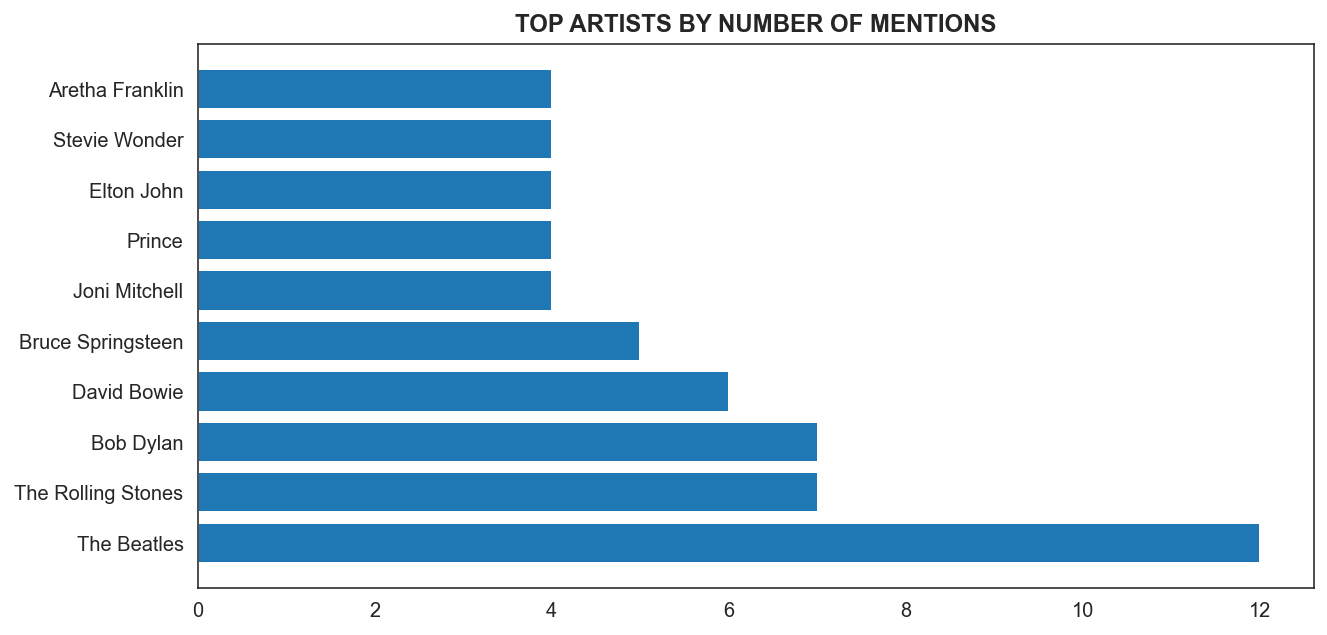

In [295]:
top_10_artists = df['Artist'].value_counts().head(10)
fig = plt.figure(figsize=(10, 5))
plt.barh(top_10_artists.index, top_10_artists)
plt.title('Top artists by number of mentions'.upper(), fontweight='bold');

No huge surprises here. Let's move on to another question.

### Is popularity correlated to ranking?

One might wonder whether the 'best' songs - i.e. the ones ranked higher by *Rolling Stone* are also the most popular; viceversa, it is legitimate to ask whether a song's (relatively) low ranking makes it less popular. Let's check by adding a `Ranking` column to our dataframe and correlating it to the `popularity` column. 


In [296]:
synthetic_display = ["Ranking", "Artist", "Title", "Year", "Popularity"]
df['Ranking'] = np.arange(500, 0, -1)

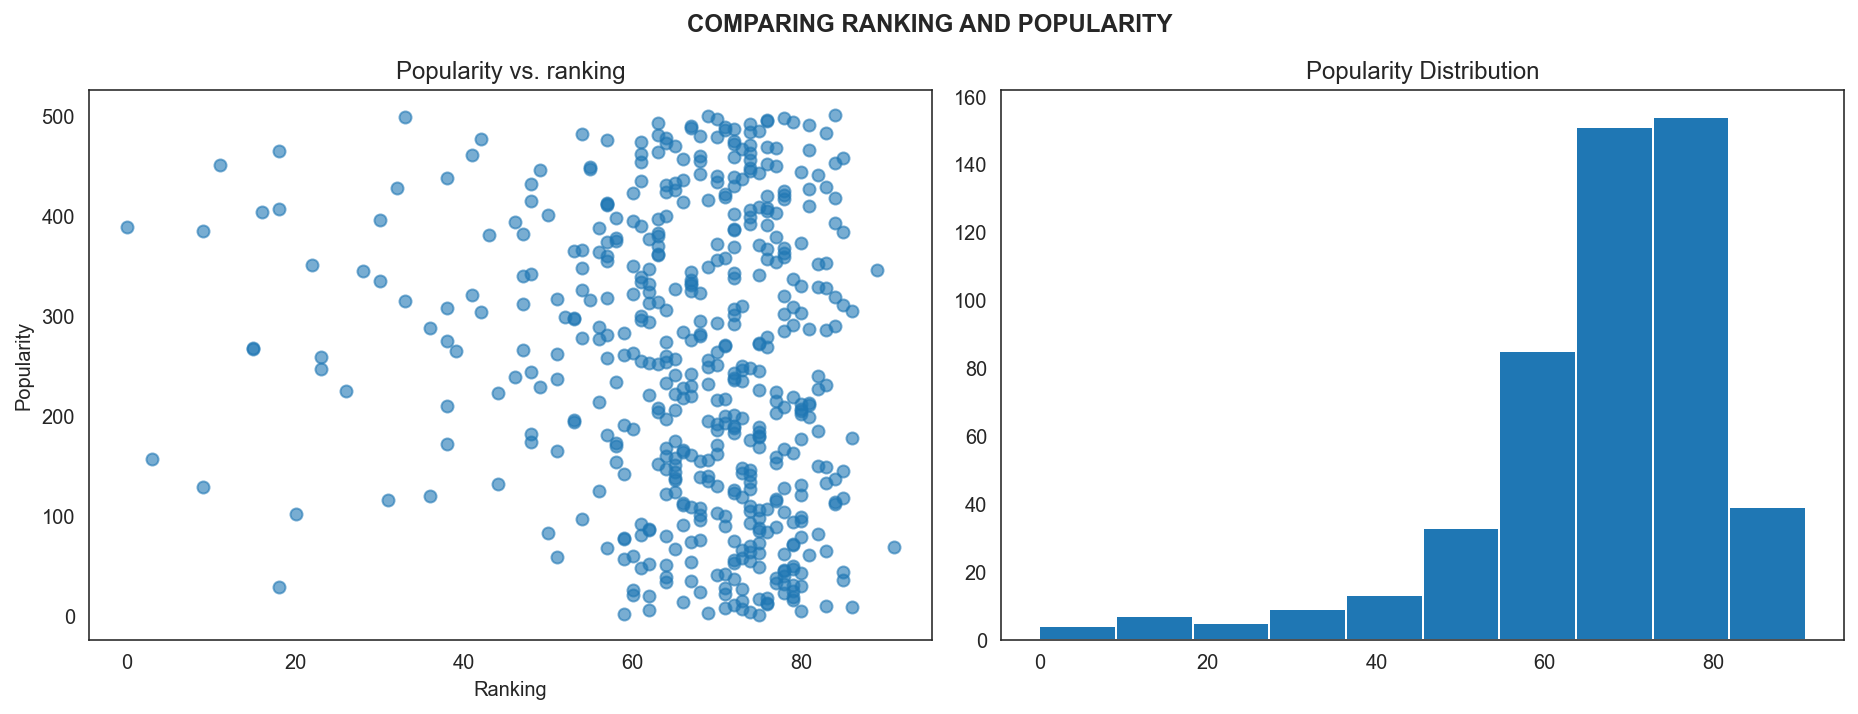

In [297]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,5))
fig.suptitle('COMPARING RANKING AND POPULARITY', fontweight='bold')
ax1.scatter(df['Popularity'], df['Ranking'], alpha=0.6)
ax1.set_title('Popularity vs. ranking')
ax1.set_xlabel('Ranking')
ax1.set_ylabel('Popularity')
ax2.hist(df['Popularity'])
ax2.set_title('Popularity Distribution')
plt.tight_layout();

While most songs seem to be fairly popular (as evidenced by the skewness of the distribution) - ranking is not correlated with popularity. Let's inspect the most popular 10 songs.

In [298]:
most_popular = df.sort_values(by='Popularity', axis=0, ascending=False)
most_popular[synthetic_display].head(10).style.hide_index()

Ranking,Artist,Title,Year,Popularity
69,Taylor Swift,All Too Well,2012,91
346,BTS,Dynamite,2020,89
178,Billie Eilish,Bad Guy,2019,86
9,Fleetwood Mac,Dreams,1977,86
305,The Police,Every Breath You Take,1983,86
145,Outkast,Ms. Jackson,2000,85
457,Bon Jovi,Livin' on a Prayer,1986,85
118,Radiohead,Creep,1992,85
36,The White Stripes,Seven Nation Army,2003,85
44,Michael Jackson,Billie Jean,1982,85


Now let's inspect the highest ranked songs:

In [299]:
df.sort_values(by="Ranking")[synthetic_display].head(10).style.hide_index()

Ranking,Artist,Title,Year,Popularity
1,Aretha Franklin,Respect,1967,75
2,Public Enemy,Fight the Power,1989,59
3,Sam Cooke,A Change Is Gonna Come,1964,69
4,Bob Dylan,Like a Rolling Stone,1965,74
5,Nirvana,Smells Like Teen Spirit,1991,80
6,Marvin Gaye,What’s Going On,1971,62
7,The Beatles,Strawberry Fields Forever,1967,73
8,Missy Elliott,Get Ur Freak On,2001,71
9,Fleetwood Mac,Dreams,1977,86
10,Outkast,Hey Ya!,2003,83


These results are not intuitive (at least to me). It might be worth looking into how the `popularity` score is calculated by Spotify before drawing any conclusions. Spotify's API [documentation](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-tracks) states that: 
>The popularity of the track. The value will be between 0 and 100, with 100 being the most popular.
The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity.

Clearly yhe popularity results are skewed towards more recent songs. It is also possible this has to do with duplicate tracks.

### How are the audio features distributed?

As I mentioned earlier, for each of the songs we can inspect it's [audio features](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features). Let's explore the distribution of the audio features (I'll plot both a standard histogram and a violinplot).

**acousticness**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

**danceability**: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

**duration_ms**: The duration of the track in milliseconds.

**energy**: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.


**instrumentalness**: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

**key**: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

**liveness**: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

**loudness**: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

**mode**: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

**speechiness**: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

**tempo**: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

**time_signature**: An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".

**valence**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative

Let's plot the features and see if we can gain any insights.

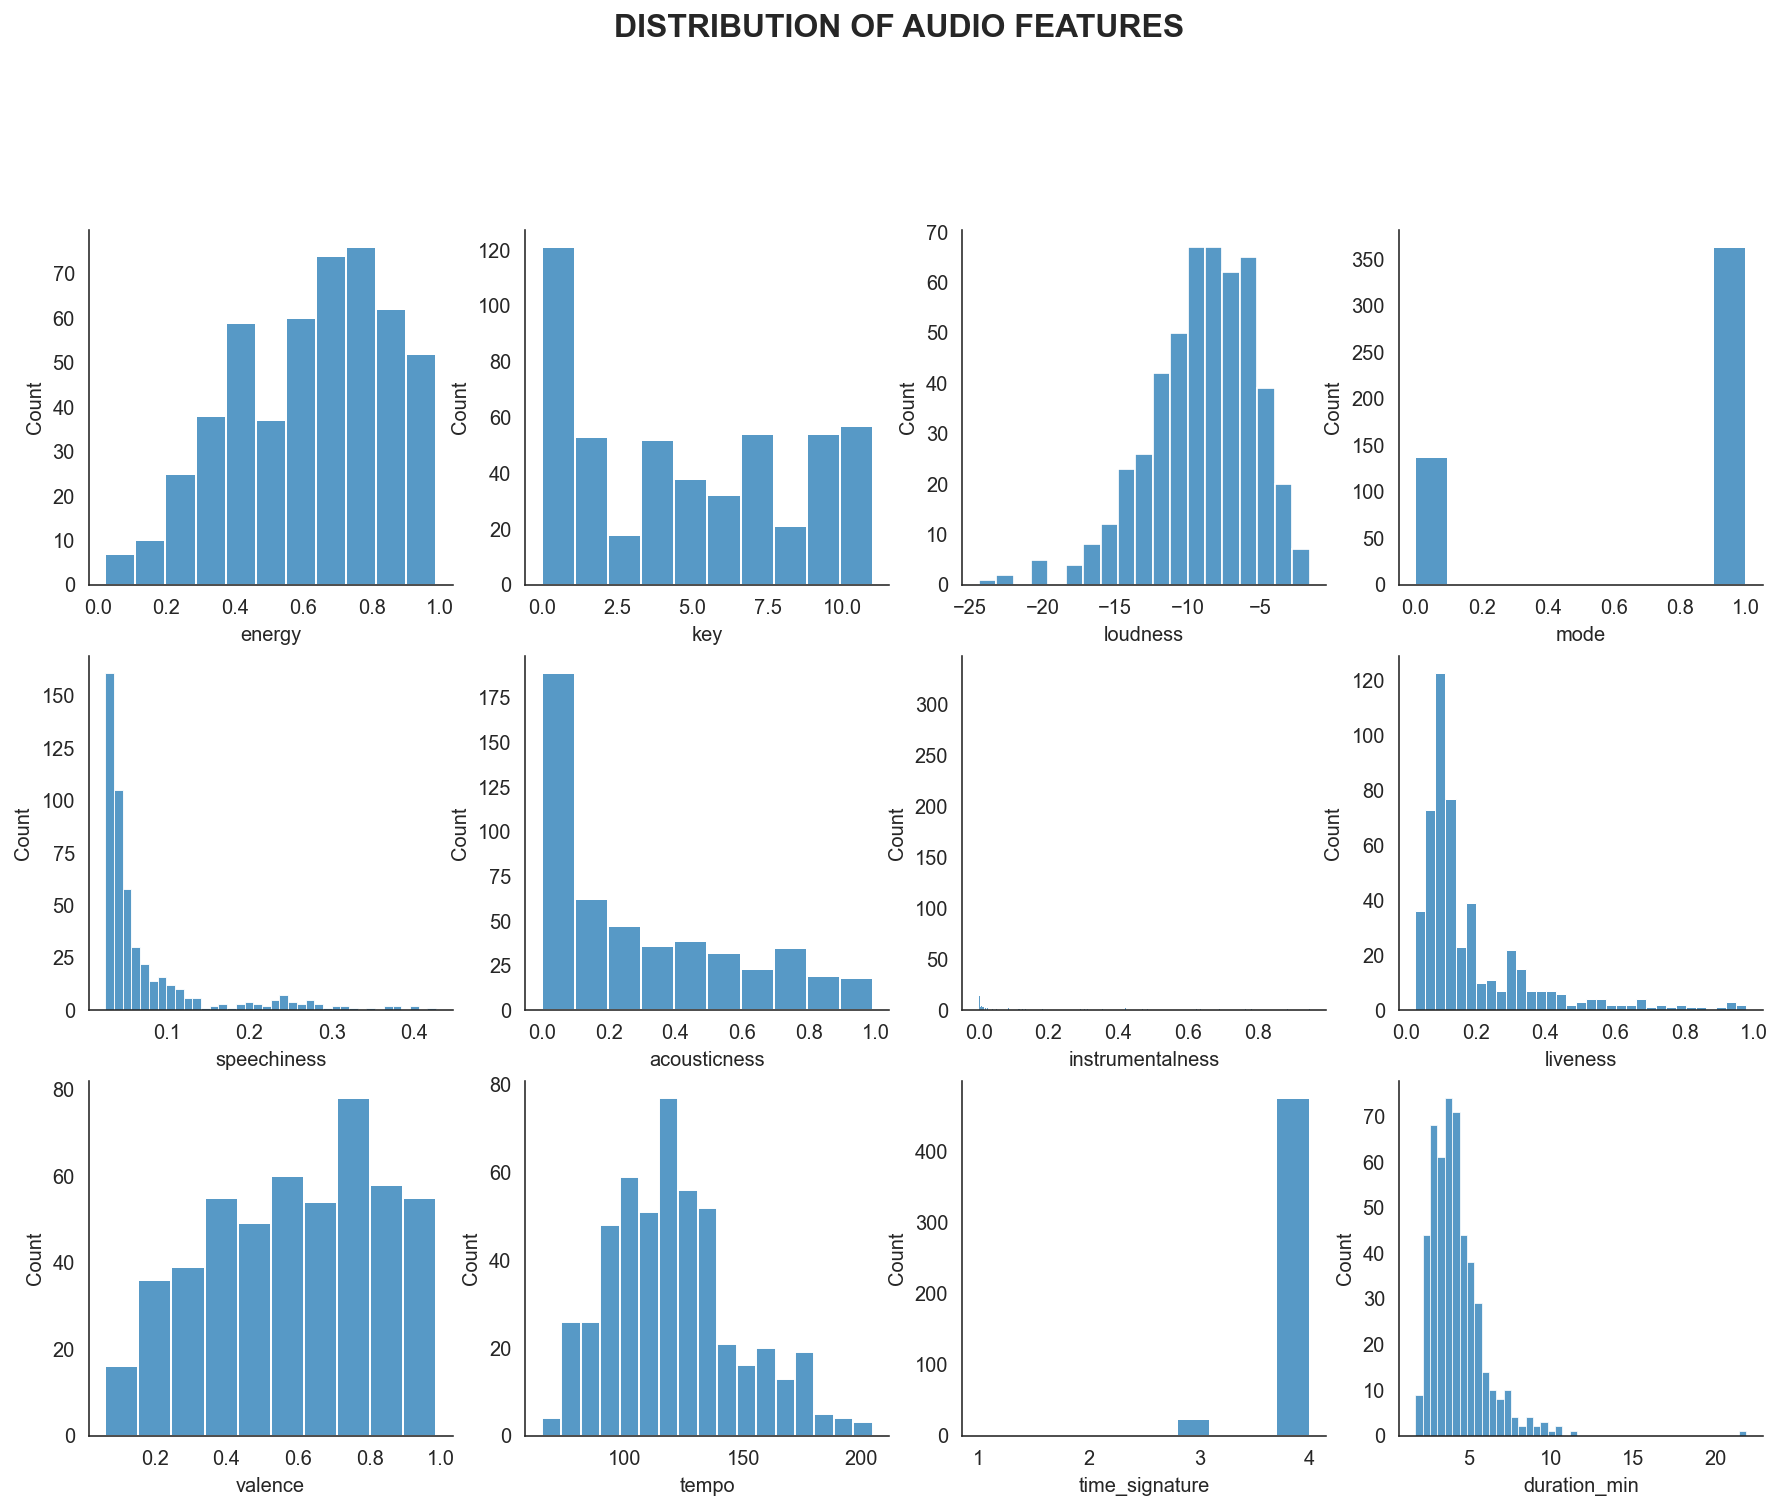

In [169]:
# create a dataframe with just the features so we can iterate over it
features = df.copy().iloc[:, 6:18]

# setup subplots
rows = 4
cols = 4
fig, ax = plt.subplots(rows, cols, figsize=(15, 15))
titles = features.columns.values
fig.suptitle('DISTRIBUTION OF AUDIO FEATURES', fontweight='bold', fontsize=16)
# counter to choose which feature to plot
title_no = 0

# deactivate plots that go over array size
while title_no < titles.size:
    for row in range(rows):
        for col in range(cols):
            if title_no >= titles.size:
                ax[row, col].set_visible(False)
            else:
                sns.histplot(features[
                titles[title_no]],
                             kde=False, ax=ax[row, col])
                sns.despine()
                title_no += 1

Let's also take a closer look at the continuous audio features.

In [218]:
continuous= ['energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_min']

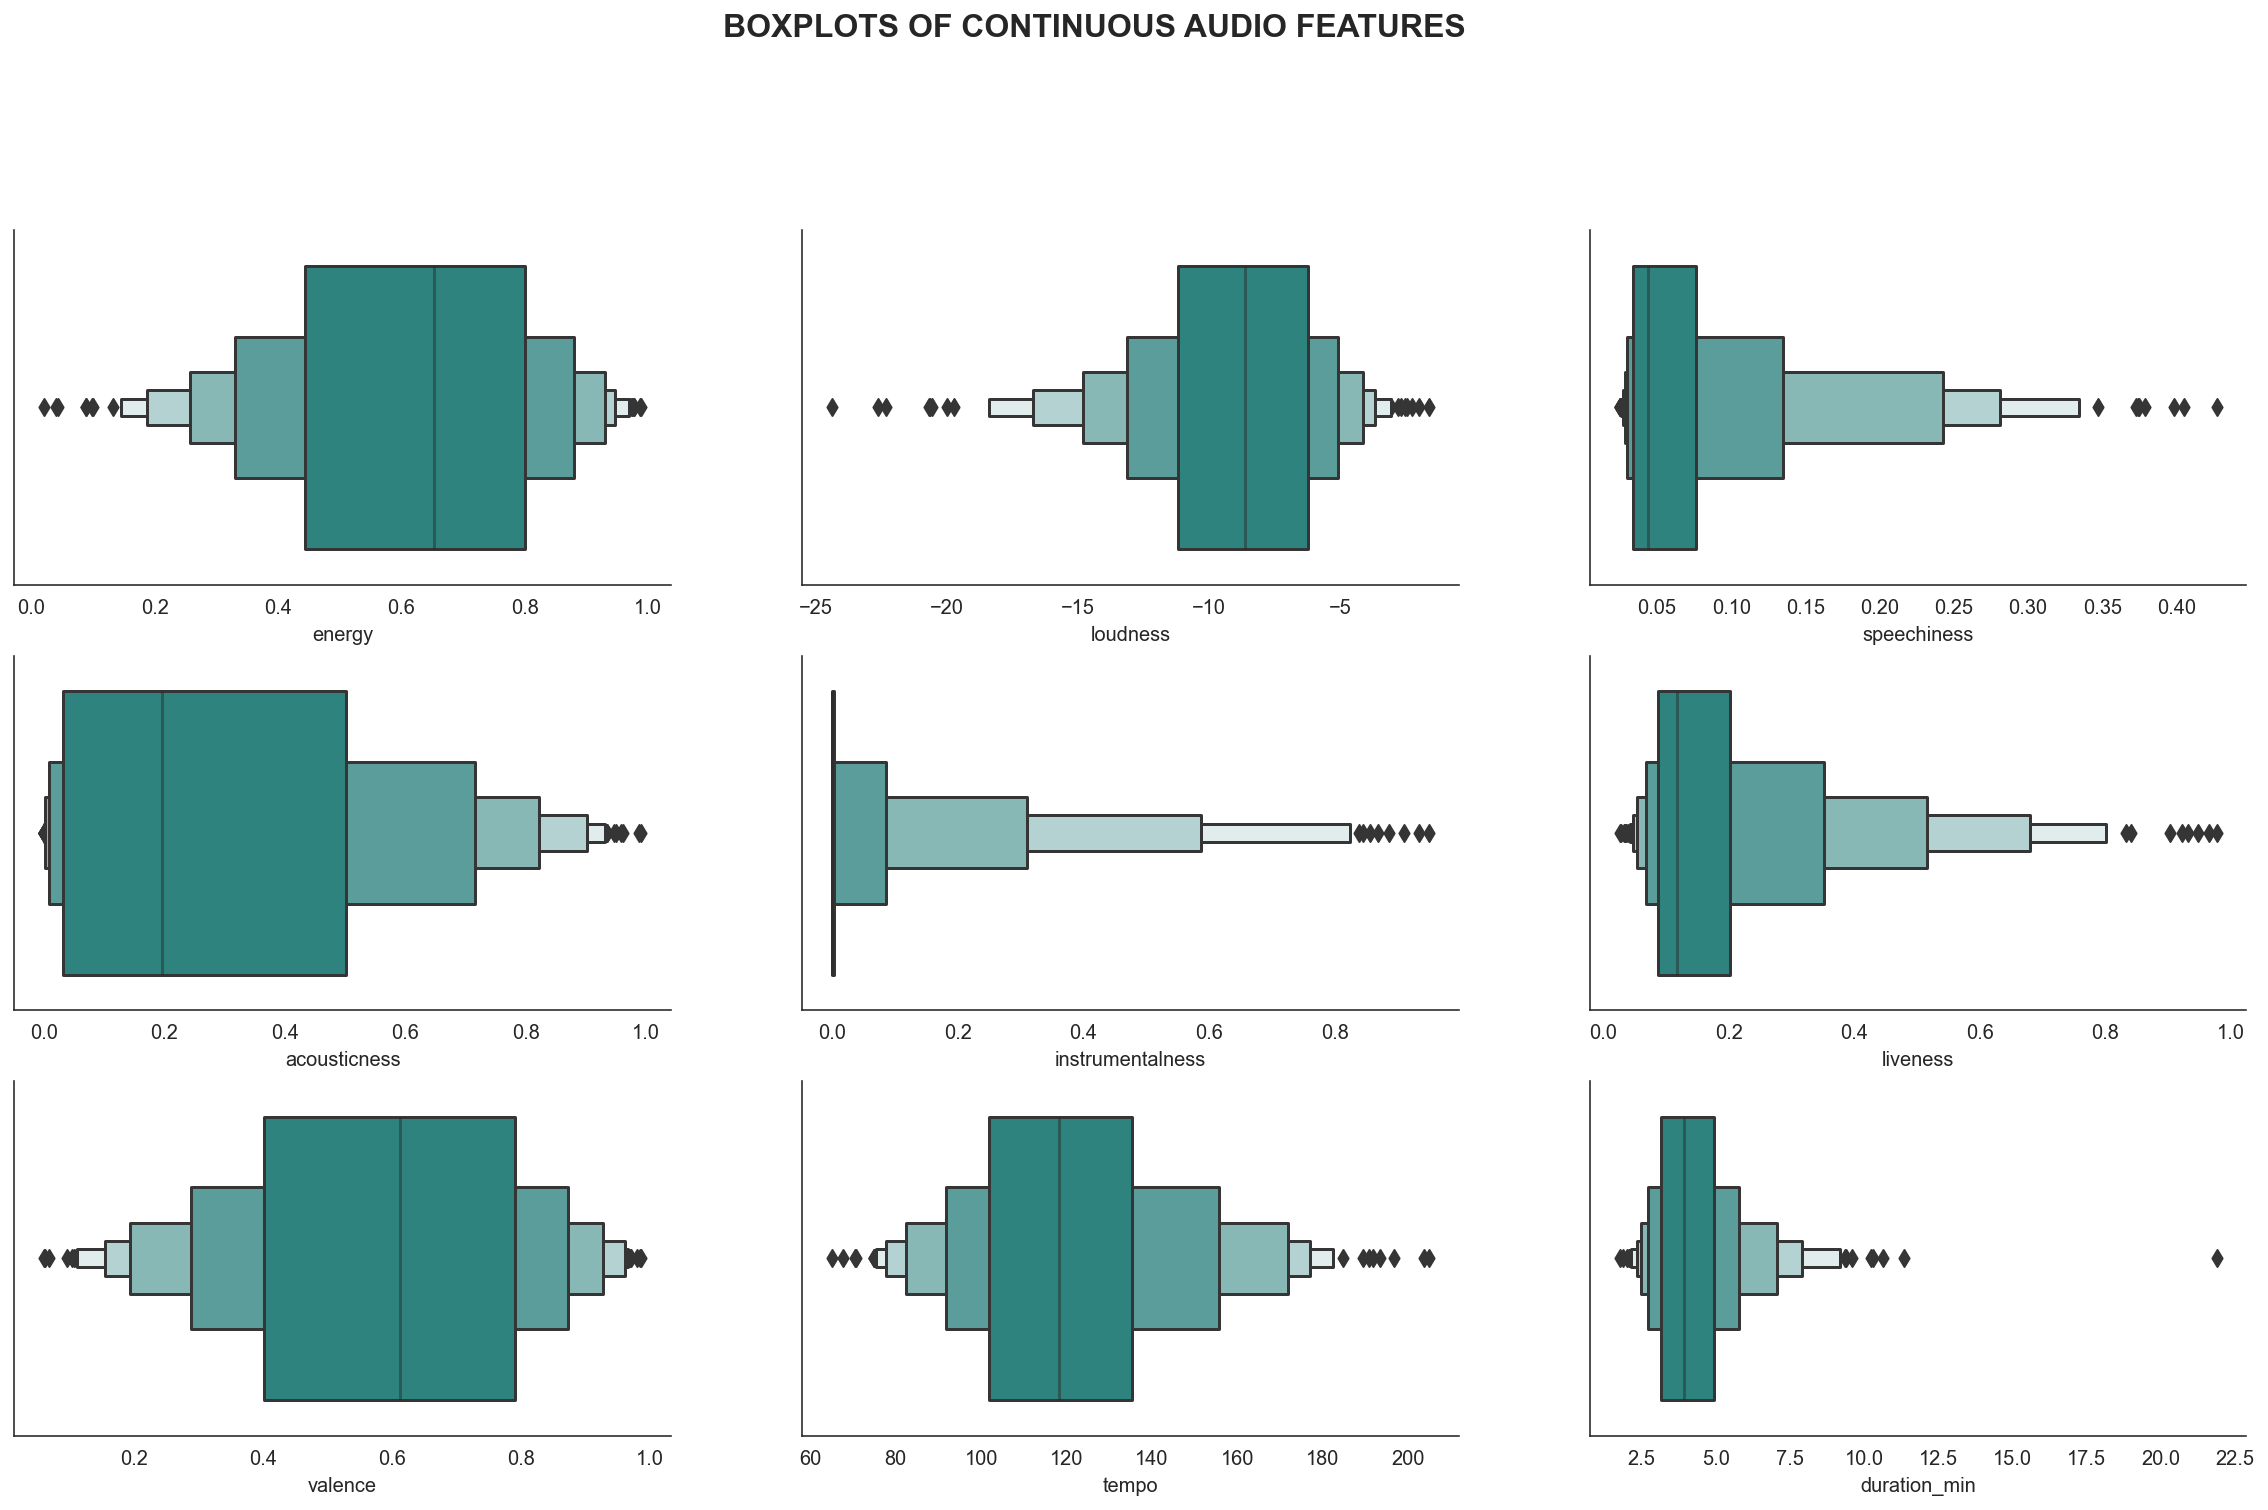

In [220]:
rows = 4
cols = 3
fig, ax = plt.subplots(rows, cols, figsize=(20,15)) #  
fig.suptitle('BOXPLOTS OF CONTINUOUS AUDIO FEATURES', fontweight= 'bold', fontsize=16)
# counter to choose which feature to plot
title_no = 0 


# deactivate plots that go over array size
while title_no < len(continuous):
    for row in range(rows):
        for col in range(cols):
            if title_no >= len(continuous):
                ax[row,col].set_visible(False)
            else:                
                sns.boxenplot(x=df[continuous[title_no]], ax=ax[row,col], palette="viridis")
                sns.despine()
                title_no +=1
                

A few quick takeaways:

* **danceability** seems to be evenly distributed
* **C** is the prevalent key
* **major** is by far the prevalent **mode**
* songs recorded in the studio are prevalent (low **liveliness**
* **4/4** dominates **time signatures**
* **duration** is mostly comprised between **2 and 5 minutes**;
* there is some tendency towards 'happy' (**valence**) and 'energetic' (**energy**) song
* both **speechiness** and **acousticness** receive a penalty.

Let's also check how these features correlate with themselves and with ranking.

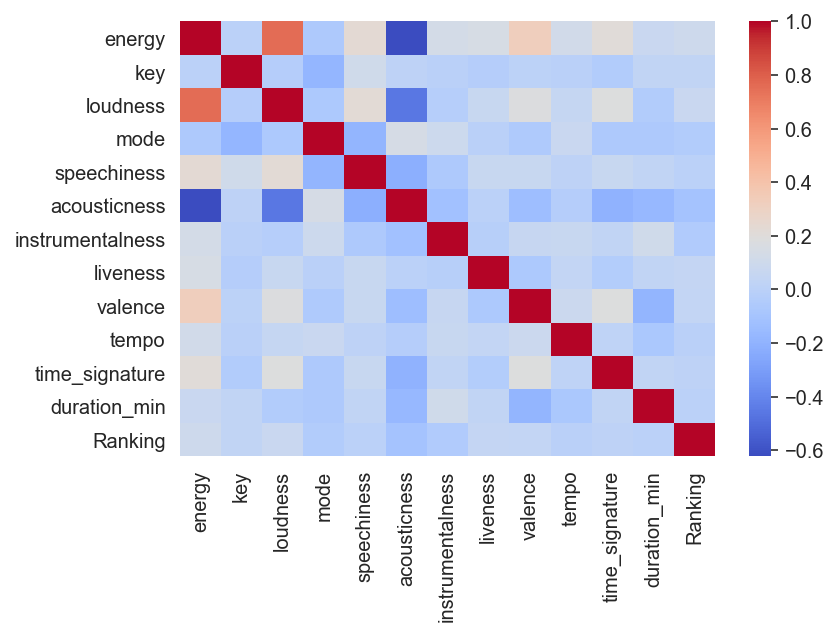

In [221]:
data = pd.concat([features, df['Ranking']], axis=1)
sns.heatmap(data.corr(), fmt="g", cmap='coolwarm')
plt.show()

Perhaps unsurprisingly no one feature seems to be a significant predictor of rank: acousticness and instrumentalness receive a modest penalty, as noted.

One thing that should bother us is that `mode` and `key` have been decoupled. Let's crete a categorical class for the actual key instead, and then take a closer look at the same data by visualizing it with boxplots.

In [222]:
keys = ["C", "C#/Db", "D", "D#/Eb", "E", "F", "F#/Gb", "G", "G#/Ab", "A", "A#/Bb", "B"]
keys_dict = {key : value for key, value in zip(range(12), keys)}
features["key_mode"] = features[["key", "mode"]].apply(lambda x: keys_dict[x[0]] + (" min" if x[1]==0 else " Maj"), axis=1)

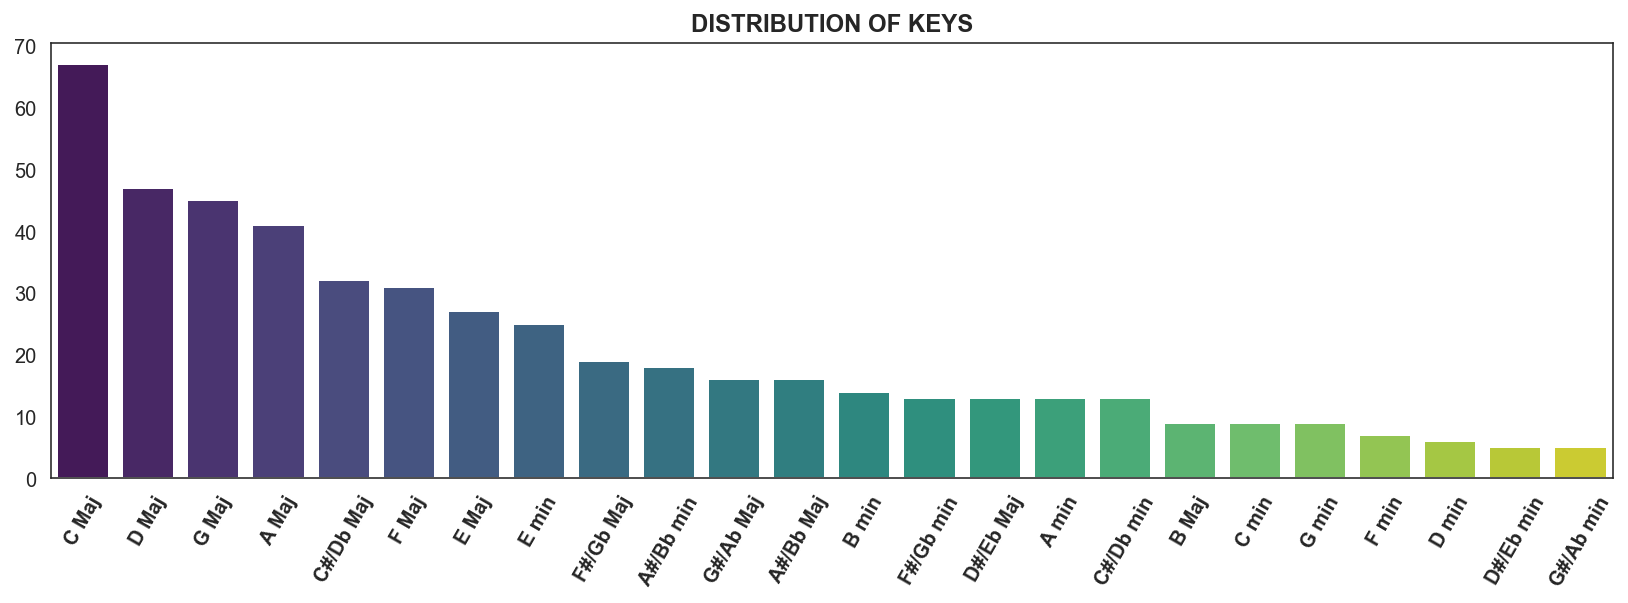

In [223]:
key_counts = features["key_mode"].value_counts()
plt.figure(figsize=(14, 4))
sns.barplot(x=key_counts.index, y=key_counts.values, data=features, palette="viridis")
plt.xticks(rotation=60, fontweight="bold")
plt.title("Distribution of keys".upper(), fontweight="bold")
plt.show()

### By the way: is D minor the saddest of all keys? Or: Why Nigel Tufnel is wrong.

The great musician and composer [Nigel Tufnel](https://en.wikipedia.org/wiki/Nigel_Tufnel) once quipped that
> D Minor is the saddest of all keys.

https://youtu.be/NgViOqGJEvM
We could plot key signatures against valence to see whether he was right.

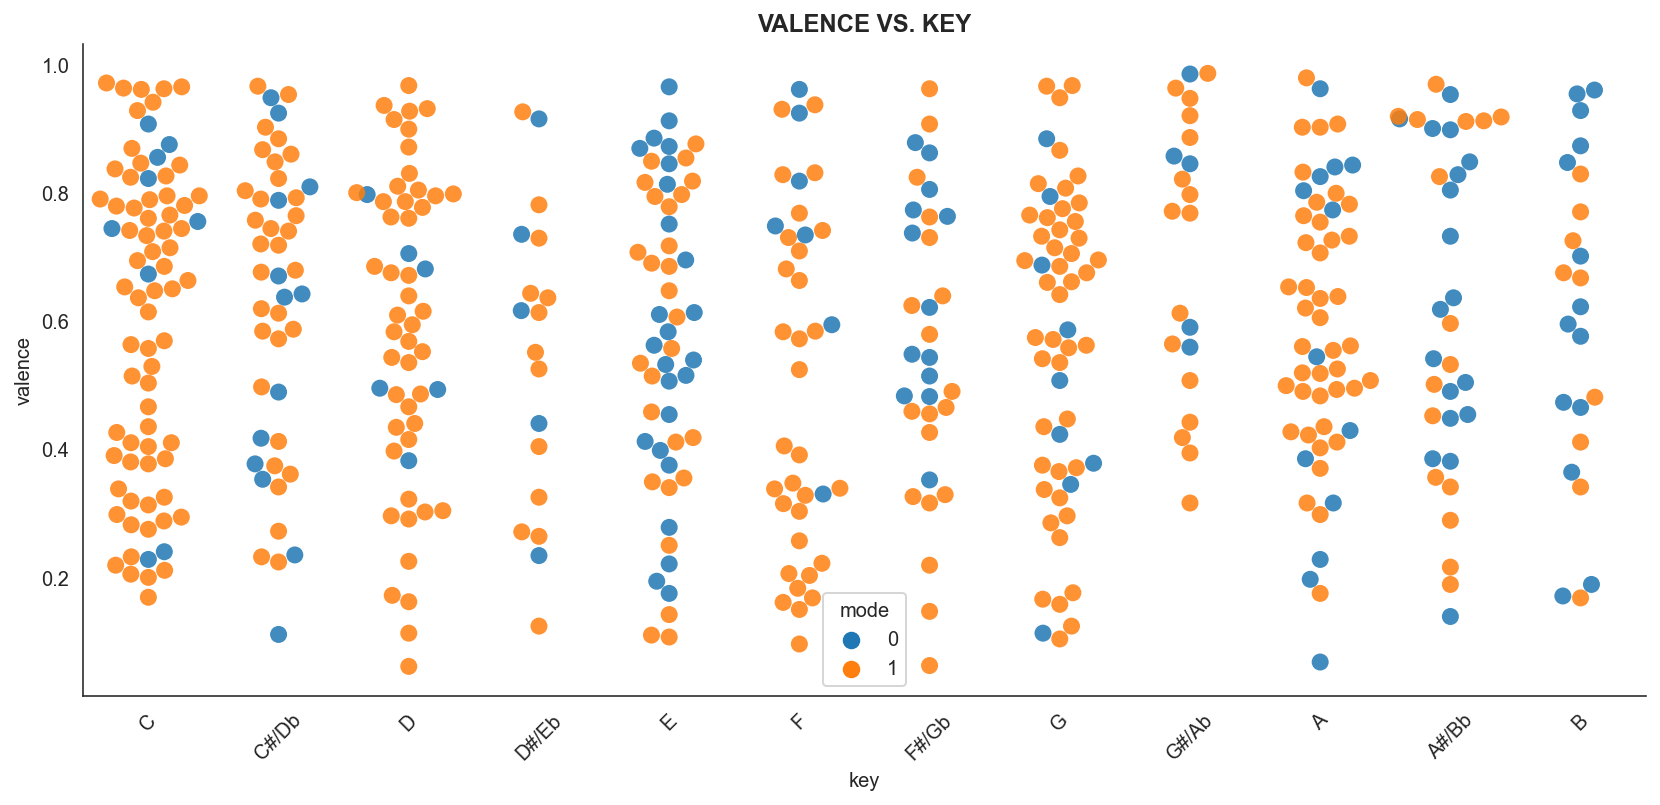

In [224]:
fig = plt.figure(figsize=(14, 6))
sns.swarmplot(y="valence", x="key", hue="mode", data=features, size=8.5, alpha=0.85)
g = plt.xticks(ticks=range(0, 12), labels=keys_dict.values(), rotation=45)
plt.title("Valence vs. key".upper(), fontweight="bold")
sns.despine()

There aren't actually that many sad songs in D minor, at least among the "greatest 500 of all times" - if anything it seems that E minor and A minor are sadder! (Remember:  tracks with low valence sound more negative. Minor mode is 0.). 

(If you are interested in the topic, a lot of people have been commenting on it: I find [this post](http://www.ethanhein.com/wp/2021/no-rolling-stone-d-minor-is-not-the-saddest-of-all-keys/) by Ethan Hein and [this video](https://youtu.be/6c_LeIXrzAk) by Adam Neely illuminating.)

### How does the dataset evolve with time?

I thought it would be interesting to see how some of the features in our dataset evolve with time. WIth the help of a couple of helper functions I added a `decade` column to the dataframe.

In [225]:
# pads two digits to convert year to 4 digits
def convert_to_full_year(year):
    try:
        year = str(year)
        if int(year[0]) in [0, 1, 2]:
            year = "20" + year
        else:
            year = "19" + year
        return int(year)
    except Exception:
        return np.nan

# converts year to decade as string
def full_year_to_decade(year):
    try:
        century =  year // 100
        year = (year % 100 // 10) * 10
        if year == 0:
            return str(century)+"00s"
        return str(century) + str(int(year))+"s"
    except Exception:
        return np.nan

In [226]:
df["decade"] = df["Year"].apply(full_year_to_decade)
decades= df.groupby("decade").count()
decades

,Artist,Title,Year,Writers,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_min,Ranking
decade,,,,,,,,,,,,,,,,,,,
1930s,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
1940s,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1950s,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24
1960s,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108
1970s,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144
1980s,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80
1990s,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70
2000s,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36
2010s,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32


Let's see how the songs are distributed across decades.

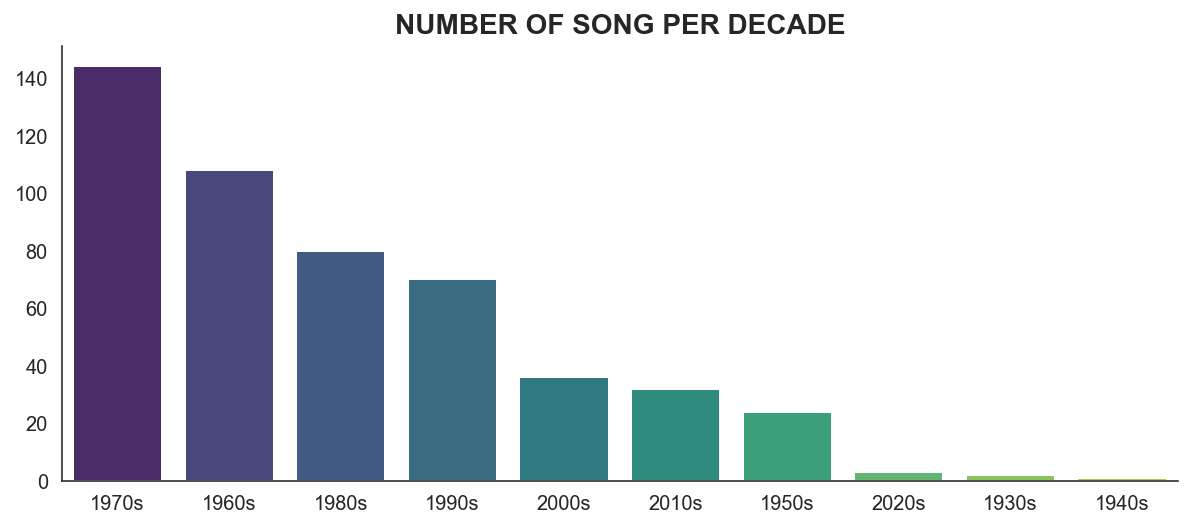

In [227]:
plt.figure(figsize=(10, 4))
sns.barplot(x=df["decade"].value_counts().index, y=df["decade"].value_counts().values, data=df, palette="viridis")
plt.title("Number of song per decade".upper(), fontweight="bold", fontsize=14)
sns.despine()

So over half of the songs have been published in the 60s or in the 70s... Some will say that this is due to music being better at those times. I am inclined to think this says something about the median age of the Rolling Stone critics. Probably both things contribute.

We can now explore how any feature evolves decade after decade. Let's check, for example, what happens to the `duration` and `loudness` features. 

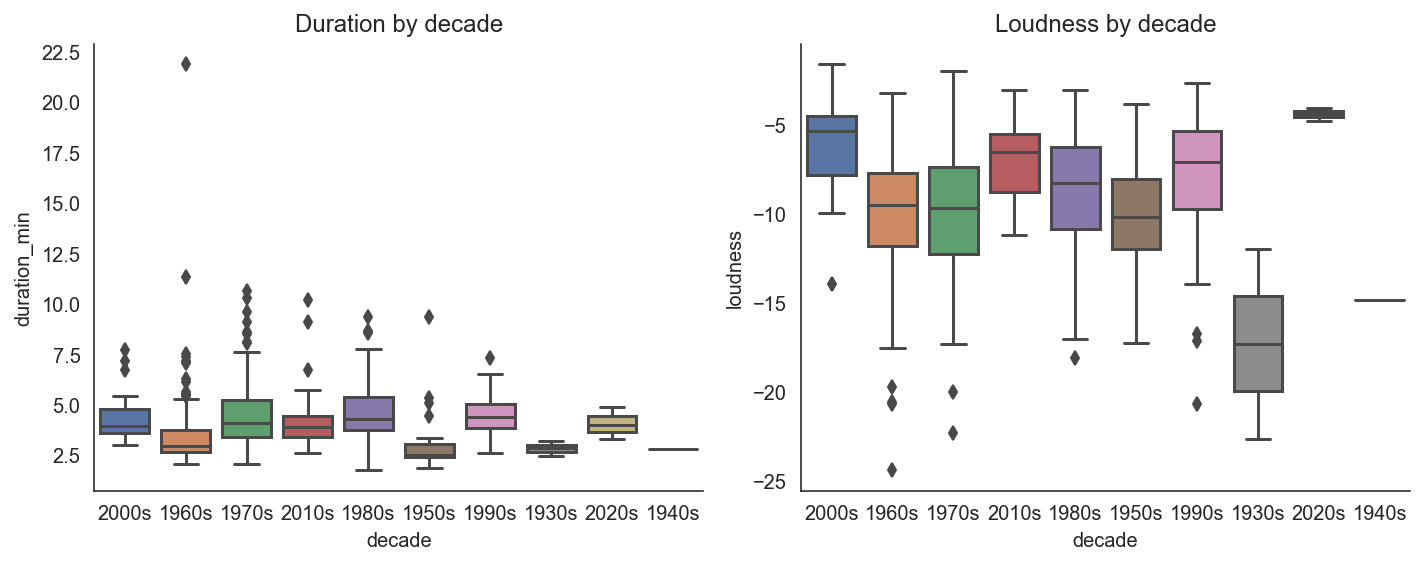

In [228]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.boxplot(data=df, x="decade", y="duration_min", palette="deep", ax=axes[0])
axes[0].set_title("Duration by decade")
sns.boxplot(data=df, x="decade", y="loudness", palette="deep", ax=axes[1])
axes[1].set_title("Loudness by decade")
sns.despine()
plt.tight_layout();

It is of little surprise that average **loudness** has increased in the past and also that there is less variance in this dimension as time goes by. Note also how much the average loudness increases in the current decade (although the sample size is low).
As for **duration** were widely more varied in the 70s. But there are two _huge_ outliers in the 60. Let's check them out.

In [229]:
df.sort_values(by="duration_min", ascending=False)[:2]

,Artist,Title,Year,Writers,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_min,Ranking,decade
185,John Coltrane,Pt. 1-Acknowledgement,1965,John Coltrane,33,0.354,0.423,7,-19.727,0,0.0587,0.152,0.114,0.193,0.345,127.528,4,21.89,315,1960s
417,Bob Dylan,Desolation Row,1965,Bob Dylan,50,0.432,0.605,4,-6.941,1,0.0306,0.673,0.000,0.129,0.647,109.227,4,11.36,83,1960s


I was curious to see which songs had the highest and lowest scores for each of the categories.

In [246]:
print(f"{'Highest scores'.upper():^80}")
print("\n")
print(f"{'Feature':<20} {'Title':<30} {'Artist':<20}")
print("-"*87)
for feature, ix in zip(features.iloc[:, :-1].idxmax().index, features.iloc[:, :-1].idxmax().values):
    print(f"{feature:<20} {df.loc[ix]['Title']:<30} {df.loc[ix]['Artist'][:32]:<20}")
print("\n")

                                 HIGHEST SCORES                                 


Feature              Title                          Artist              
---------------------------------------------------------------------------------------
energy               When Doves Cry                 Prince and the Revolution
key                  212                            Azealia Banks       
loudness             Crazy                          Gnarls Barkley      
mode                 Baby Love                      The Supremes        
speechiness          Flava in Ya Ear (Remix)        Craig Mack feat. Notorious B.I.G
acousticness         Teenage Riot                   Sonic Youth         
instrumentalness     Green Onions                   Booker T. and the MGs
liveness             Tyrone                         Erykah Badu         
valence              Pressure Drop                  Toots and the Maytals
tempo                Doll Parts                     Hole                
time_si

In [247]:
print(f"{'Lowest scores'.upper():^80}")
print("\n")
print(f"{'Feature':<20} {'Title':<30} {'Artist':<20}")
print("-"*87)

for feature, ix in zip(features.iloc[:, :-1].idxmin().index, features.iloc[:, :-1].idxmin().values):
    print(f"{feature:<20} {df.loc[ix]['Title']:<30} {df.loc[ix]['Artist'][:32]:<20}")
print("\n")

                                 LOWEST SCORES                                  


Feature              Title                          Artist              
---------------------------------------------------------------------------------------
energy               Crazy                          Patsy Cline         
key                  You're So Vain                 Carly Simon         
loudness             Crazy                          Patsy Cline         
mode                 Stronger                       Kanye West          
speechiness          Waterloo Sunset                The Kinks           
acousticness         Summer Babe (Winter Version)   Pavement            
instrumentalness     Stronger                       Kanye West          
liveness             B.O.B.                         Outkast             
valence              Lose Yourself                  Eminem              
tempo                Without You                    Harry Nilsson       
time_signature       Solsb

I also got to wonder if there were a way to find out which were the most representative songs in term of some audio features, e.g. in a given decade. 
[This post](https://stackoverflow.com/questions/30112202/how-do-i-find-the-closest-values-in-a-pandas-series-to-an-input-number) on _Stack Overflow_  pointed me in the right direction. The idea is to have a function that sorts a dataframe by the values closest to the mean in a given column. For example, if you want to have the sonf that's closest to the mean in terms of duration, you would call `sort_by_closest_to_mean(df, 'duration')[0]`.

In [249]:
def sort_by_closest_to_mean(frame, column):
    mean = df[column].mean()
    return frame.iloc[(df[column]-mean).abs().argsort()]

In [287]:
print(f"Mean for dataset: \t{df.duration_min.mean():.2f}")
duration_mean_df = sort_by_closest_to_mean(df, "duration_min")
print(duration_mean_df.iloc[0][["duration_min", "Title", "Artist"]])

Mean for dataset: 	4.26
duration_min                                4.26
Title                                  I Like It
Artist          Cardi B, J Balvin, and Bad Bunny
Name: 116, dtype: object


### Linear Regression? Really?

All right, this is just for fun.... Please do not take it too seriously. But what happens if one were to run a linear regression on the dataset? Well, here it goes.

In [290]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder

X = np.array(features.drop(["key_mode", "duration_min"], axis=1).values)
y = df["Ranking"].values

m = LinearRegression()

scaler = StandardScaler()
X = scaler.fit_transform(X)

reg = m.fit(X, y)
reg.coef_, reg.intercept_

print("-"*35)
print(f"feature\t\t\t{'coef':>10}")
print("-"*35)
for feature, coef in list(zip(features.columns, reg.coef_)):
    print(f"{feature:20}\t {coef:>10.2f}")
print("-"*35)

-----------------------------------
feature			      coef
-----------------------------------
energy              	       7.92
key                 	       4.90
loudness            	      -1.32
mode                	      -2.76
speechiness         	      -6.29
acousticness        	     -12.67
instrumentalness    	      -9.30
liveness            	       6.35
valence             	       3.69
tempo               	      -1.44
time_signature      	      -1.86
-----------------------------------
